# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [73]:
# Q1-1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

df = pd.read_csv('./data/college_completion.csv',low_memory=False)

In [74]:
# Q1-2
print(df.shape)
print(df.columns.tolist())
df.head()

(3798, 63)
['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control', 'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count', 'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value', 'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value', 'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile', 'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile', 'endow_value', 'endow_percentile', 'grad_100_value', 'grad_100_percentile', 'grad_150_value', 'grad_150_percentile', 'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile', 'ft_fac_value', 'ft_fac_percentile', 'vsa_year', 'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first', 'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first', 'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first', 'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first', 'vsa_grad_after4_transfer', 'vsa_grad_elsewhere_after4_transfer', 'vsa_enroll_after4_tra

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


The dimension is 3798 x 63 with 3790 observations and 63 variables. The variables included are ['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control', 'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count', 'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value', 'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value', 'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile', 'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile', 'endow_value', 'endow_percentile', 'grad_100_value', 'grad_100_percentile', 'grad_150_value', 'grad_150_percentile', 'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile', 'ft_fac_value', 'ft_fac_percentile', 'vsa_year', 'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first', 'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first', 'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first', 'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first', 'vsa_grad_after4_transfer', 'vsa_grad_elsewhere_after4_transfer', 'vsa_enroll_after4_transfer', 'vsa_enroll_elsewhere_after4_transfer', 'vsa_grad_after6_transfer', 'vsa_grad_elsewhere_after6_transfer', 'vsa_enroll_after6_transfer', 'vsa_enroll_elsewhere_after6_transfer', 'similar', 'state_sector_ct', 'carnegie_ct', 'counted_pct', 'nicknames', 'cohort_size']


In [75]:
# Q1-3
print(pd.crosstab(df['control'],df['level']))
print(pd.crosstab(df['control'],df['level'],normalize="all"))

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632
level                     2-year    4-year
control                                   
Private for-profit      0.122433  0.138757
Private not-for-profit  0.017904  0.310690
Public                  0.243813  0.166403


According to the cross tabulate result between control and level, we can tell that the most popular choice among all is private not-for-profit 4-year, with a percentage of 31. The second popular choice is public 2-year which has a percentage of 24%. According to the data, it is clear to say that among all institutions, 4-year is a more popular choice than 2-year

<Axes: xlabel='grad_100_value', ylabel='Count'>

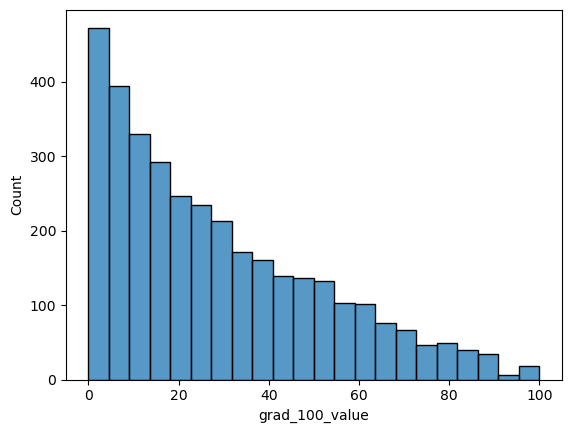

In [76]:
# Q1-4 
sns.histplot(df['grad_100_value'])


<Axes: xlabel='grad_100_value', ylabel='Density'>

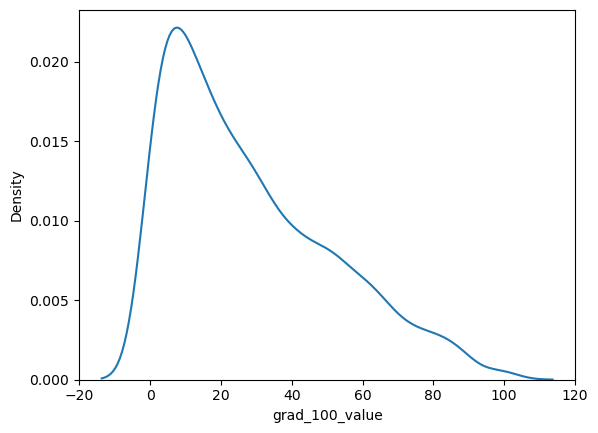

In [77]:
sns.kdeplot(data=df,x='grad_100_value')

<Axes: ylabel='grad_100_value'>

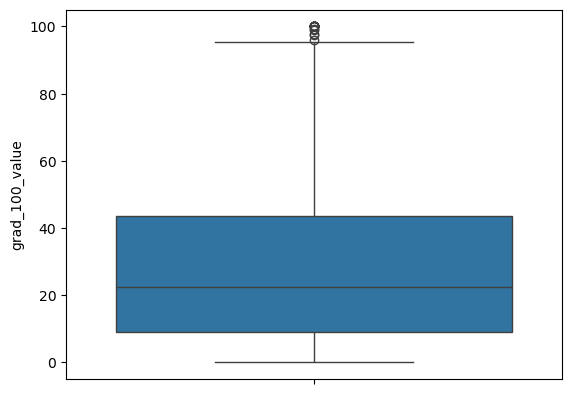

In [78]:
sns.boxplot(df['grad_100_value'])

In [79]:
df['grad_100_value'].describe()

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64

<Axes: xlabel='grad_100_value', ylabel='Density'>

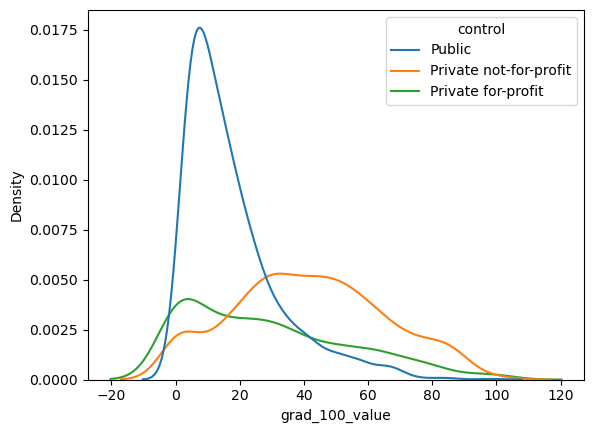

In [80]:
# Q1-5
var = 'grad_100_value'
var1 = 'control'
var2 = 'level'
sns.kdeplot(data=df, x=var, hue=var1)

<Axes: xlabel='grad_100_value', ylabel='Density'>

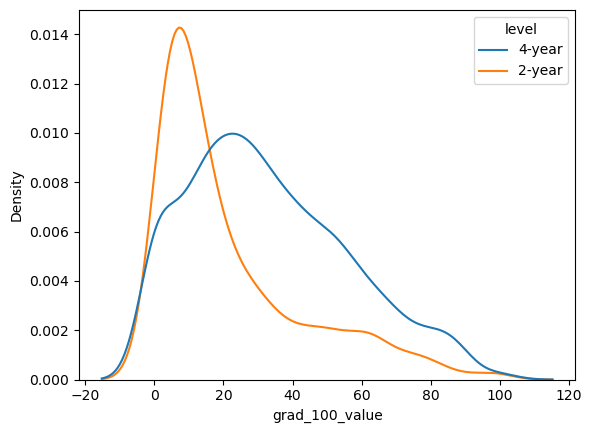

In [81]:
sns.kdeplot(data=df, x=var, hue=var2)

According to two kernel density plots, we can see that private not-for-profit and 4-year have the peaks that are closer, demonstrating that these two have higher percentage values. 

In [82]:
df.loc[:,[var,var1]].groupby(var1).describe()

grad_100_value                                          \
                                count       mean        std  min    25%   50%   
control                                                                         
Private for-profit              779.0  29.108858  25.601687  0.0   6.95  24.7   
Private not-for-profit         1189.0  41.660976  23.551231  0.0  25.00  41.0   
Public                         1499.0  17.430887  14.729443  0.0   6.90  13.2   

                                      
                          75%    max  
control                               
Private for-profit      46.75  100.0  
Private not-for-profit  58.30  100.0  
Public                  23.25   97.8

In [83]:
df.loc[:,[var,var2]].groupby(var2).describe()

grad_100_value                                                      
                count       mean        std  min   25%   50%     75%    max
level                                                                      
2-year         1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year         2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0

From describe we can see that private not-for-profit has the highest average valuem, 42%, showing that it has the best graduation rates. The results align with the kernel density plots.

<Axes: xlabel='grad_100_value', ylabel='Density'>

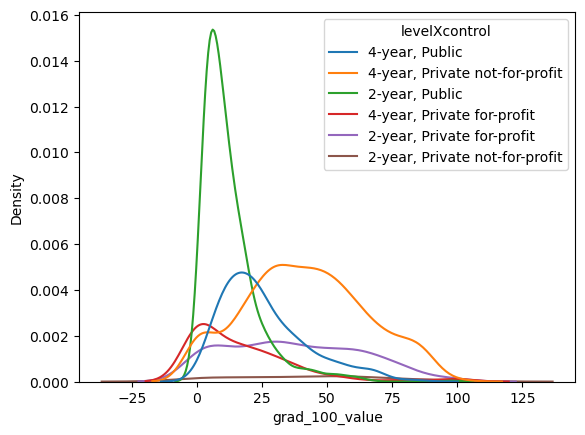

In [84]:
# Q1-6
df['levelXcontrol']=df['level']+', '+df['control']
var3 = 'levelXcontrol'
sns.kdeplot(data=df, x=var, hue=var3)

In [85]:
df.loc[:,[var,var3]].groupby(var3).describe()

grad_100_value                             \
                                        count       mean        std  min   
levelXcontrol                                                              
2-year, Private for-profit              461.0  37.197614  25.497380  0.0   
2-year, Private not-for-profit           68.0  41.913235  28.348302  0.0   
2-year, Public                          926.0  12.400000  10.893600  0.0   
4-year, Private for-profit              318.0  17.382704  20.788525  0.0   
4-year, Private not-for-profit         1121.0  41.645674  23.243453  0.0   
4-year, Public                          573.0  25.561082  16.403902  0.0   

                                                             
                                   25%   50%     75%    max  
levelXcontrol                                                
2-year, Private for-profit      15.800  33.9  57.800  100.0  
2-year, Private not-for-profit  16.225  44.4  61.200  100.0  
2-year, Public                   5.100   9.4  16.175   97.8  
4-year, Private for-profit       0.000  12.5  26.325  100.0  
4-year, Private not-for-profit  25.000  41.0  57.800  100.0  
4-year, Public                  13.600  21.8  33.800   86.3

According to the description, it is clear to see that, no matter how long it is, private not-for-profit always has a better mean value, so it appears to have the best graduation rate.

<Axes: xlabel='aid_value', ylabel='Density'>

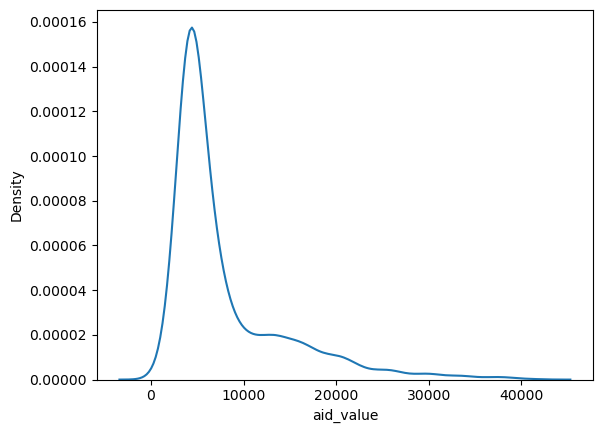

In [86]:
# Q1-7
var='aid_value'
sns.kdeplot(data=df, x=var)

<Axes: xlabel='aid_arcsinh', ylabel='Density'>

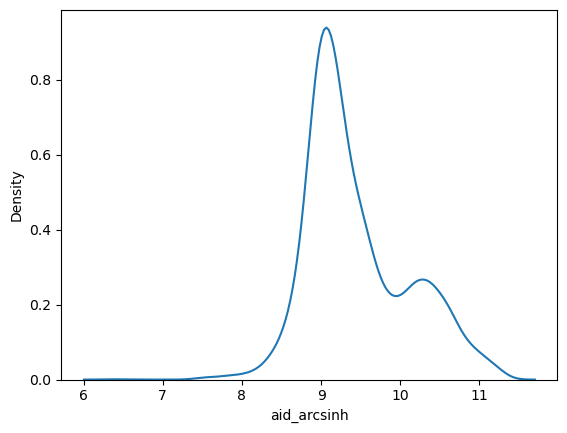

In [87]:
df['aid_arcsinh'] = np.arcsinh(df['aid_value'])
var_arcsinh='aid_arcsinh'
sns.kdeplot(data=df, x=var_arcsinh)

<Axes: xlabel='aid_value', ylabel='Density'>

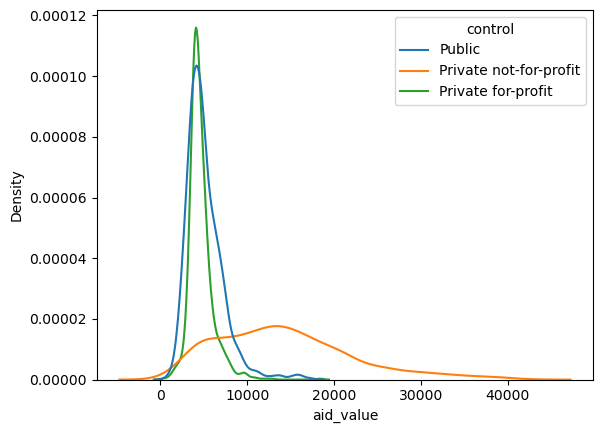

In [88]:
sns.kdeplot(data=df, x=var, hue=var1)

<Axes: xlabel='aid_value', ylabel='Density'>

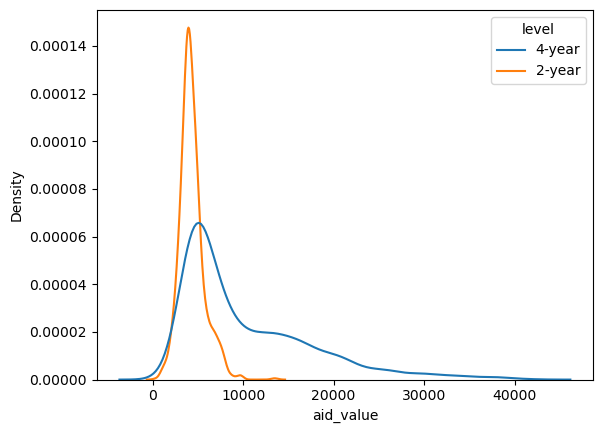

In [89]:
sns.kdeplot(data=df, x=var, hue=var2)

In [90]:
df.loc[:,[var,var1]].groupby(var1).describe()

aid_value                                             \
                           count          mean          std    min      25%   
control                                                                       
Private for-profit         991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit    1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                    1558.0   5094.835687  2136.436370  881.0  3725.25   

                                                   
                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0  18571.0  41580.0  
Public                   4667.0   6087.5  17299.0

In [91]:
df.loc[:,[var,var2]].groupby(var2).describe()

aid_value                                                             \
           count          mean          std    min     25%     50%      75%   
level                                                                         
2-year    1458.0   4310.878601  1384.045631  294.0  3485.5  4113.0   4890.0   
4-year    2339.0  10235.379222  7227.369167  902.0  4830.5  7222.0  14046.0   

                 
            max  
level            
2-year  13654.0  
4-year  41580.0

The first peak is created by private for-profit and public, which have similar mean values around 5000, and the second peak is caused by private not-for-profit, that has a higher mean values showing a higher aid value.


<Axes: xlabel='aid_value', ylabel='grad_100_value'>

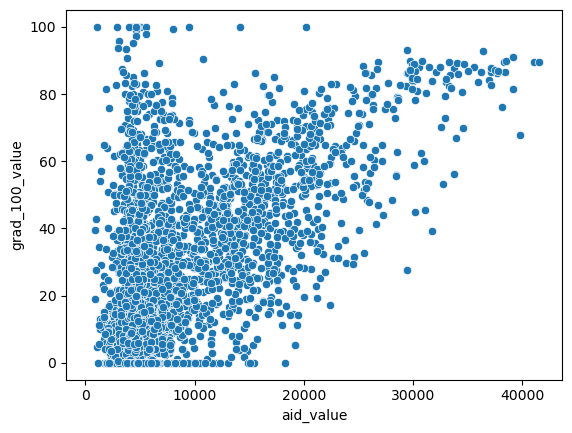

In [92]:
# Q1-8
var_x='aid_value'
var_y='grad_100_value'
sns.scatterplot(data=df,x=var_x,y=var_y)

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

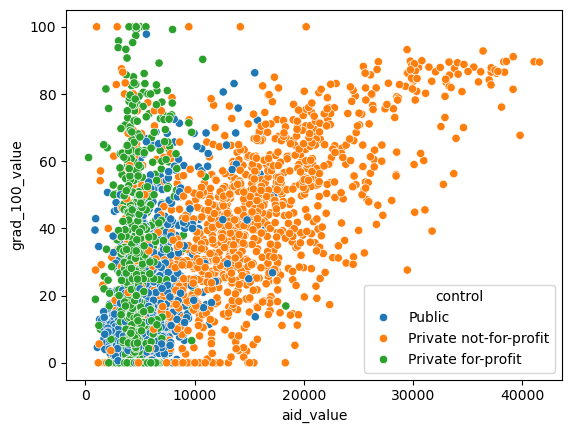

In [93]:
sns.scatterplot(data=df,x=var_x,y=var_y,hue=var1)

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

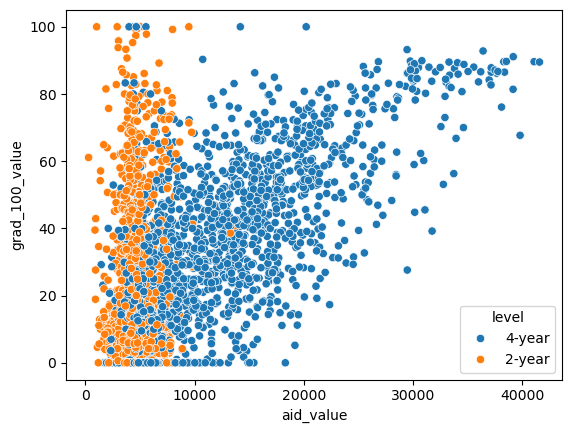

In [94]:
sns.scatterplot(data=df,x=var_x,y=var_y,hue=var2)

In the general scatter plot, two trends are noticeable. One trend shows a positive correlation between aid_value and grad_100_value, while the other trend is represented by a vertical line where the aid_value remains constant as grad_100_value increases. After applying groupby, it becomes evident that the positive association is primarily observed in 4-year private not-for-profit institutions. Other institutions tend to keep the aid_value low even with a high grad_100_value.

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them? 
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

In [95]:
#Q4-1
df = pd.read_csv('./data/covid19_nurse.csv',low_memory=False)

In [96]:
print(df.shape)
print(df.columns.tolist())
df.head()

(3411897, 36)
['Week Ending', 'Federal Provider Number', 'Provider Name', 'Provider Address', 'Provider City', 'Provider State', 'Provider Zip Code', 'Provider Phone Number', 'County', 'Submitted Data', 'Passed Quality Assurance Check', 'Residents Weekly Confirmed COVID-19', 'Residents Total Confirmed COVID-19', 'Residents Weekly All Deaths', 'Residents Total All Deaths', 'Residents Weekly COVID-19 Deaths', 'Residents Total COVID-19 Deaths', 'Number of All Beds', 'Total Number of Occupied Beds', 'Residents Hospitalizations with Confirmed COVID-19', 'Residents Hospitalizations with Confirmed COVID-19 and Up to Date with Vaccines', 'Staff Weekly Confirmed COVID-19', 'Staff Total Confirmed COVID-19', 'Weekly Resident Confirmed COVID-19 Cases Per 1,000 Residents', 'Weekly Resident COVID-19 Deaths Per 1,000 Residents', 'Total Resident Confirmed COVID-19 Cases Per 1,000 Residents', 'Total Resident COVID-19 Deaths Per 1,000 Residents', 'Number of Residents who are Up to Date on COVID-19 Vacci

,Week Ending,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Provider Phone Number,County,Submitted Data,...,"Total Resident COVID-19 Deaths Per 1,000 Residents","Number of Residents who are Up to Date on COVID-19 Vaccinations, 14 Days or More Before Positive Test",Number of Residents Staying in this Facility for At Least 1 Day This Week,Number of All Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week,Number of Residents Staying in this Facility for At Least 1 Day This Week Up to Date with COVID-19 Vaccines,Recent Percentage of Current Residents Up to Date with COVID-19 Vaccines,Percentage of Current Residents Up to Date with COVID-19 Vaccines,Number of Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week Up to Date with COVID-19 Vaccines,Recent Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines,Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines
0,05/24/20,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,88.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,05/31/20,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,95.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06/07/20,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,93.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06/14/20,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,93.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06/21/20,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,88.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Q4-3
The data dictionary document indicates that for categorical variables, possible values include Y/N corresponding to Yes and No. However, the document doesn't explain how missing value is handled. According to csv data, all missing value are instead empty string that are not sufficiently handled.

In [121]:
#Q4-4
df = df.rename(columns={'Residents Weekly Confirmed COVID-19':'week_confirmed',
                       'Residents Weekly All Deaths':'week_death_sum',
                       'Residents Weekly COVID-19 Deaths':'week_death_covid',
                       'Total Number of Occupied Beds':'bed'})
df.loc[:,['week_confirmed','week_death_sum','week_death_covid','bed']].describe()


,week_confirmed,week_death_sum,week_death_covid,bed
count,3.361675e+06,3.361675e+06,3.361675e+06,3.342644e+06
mean,6.384972e-01,4.122784e-01,5.137855e-02,7.864329e+01
std,2.966140e+00,1.354383e+00,5.428641e-01,4.881658e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01
50%,0.000000e+00,0.000000e+00,0.000000e+00,7.100000e+01
75%,0.000000e+00,1.000000e+00,0.000000e+00,9.800000e+01
max,4.130000e+02,5.220000e+02,8.900000e+01,2.689000e+03


<Axes: ylabel='week_confirmed'>

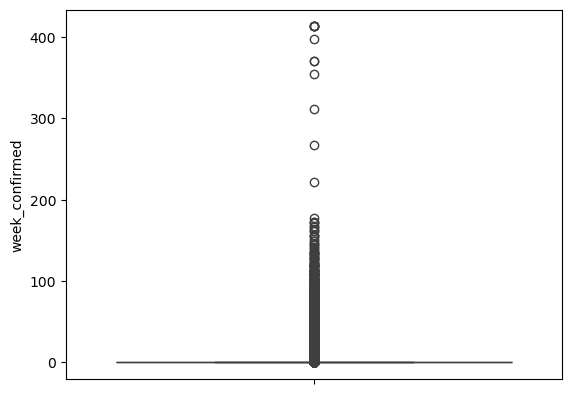

In [122]:
sns.boxplot(df['week_confirmed'])

<Axes: ylabel='week_death_sum'>

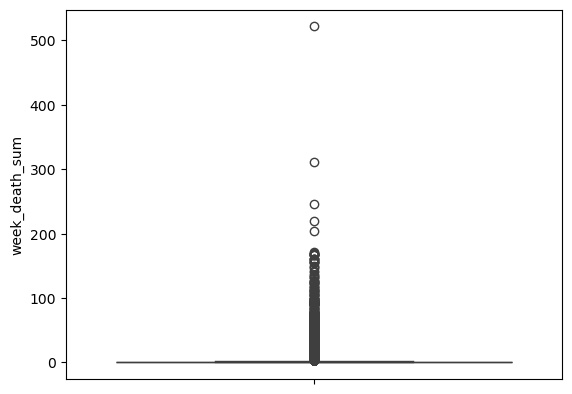

In [123]:
sns.boxplot(df['week_death_sum'])

<Axes: ylabel='week_death_covid'>

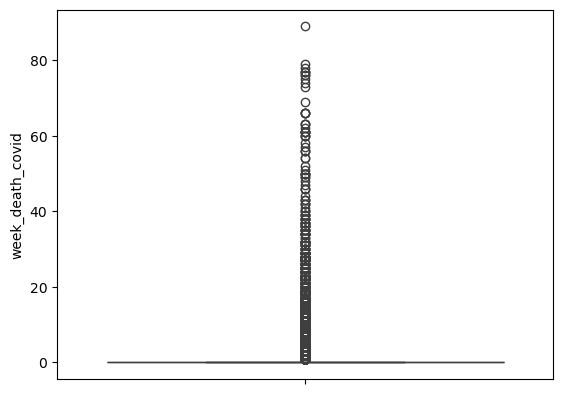

In [124]:
sns.boxplot(df['week_death_covid'])

<Axes: ylabel='bed'>

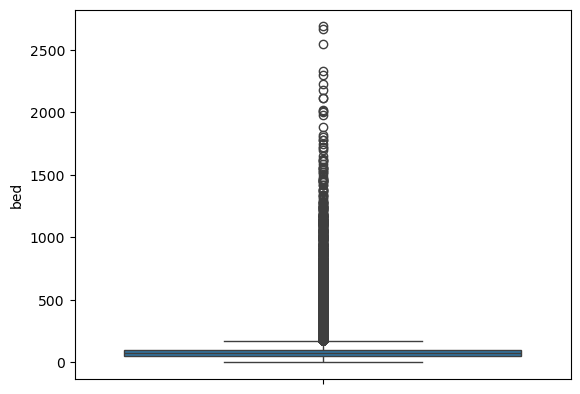

In [125]:
sns.boxplot(df['bed'])

It is clear to see that all four graphs exhibit a significant number of outliers. In each plot, the majority of the data is concentrated at the lower values, with long lines of outliers extending upwards. It is reasonable as most nursing homes report few or no cases or deaths, leading to the concentration of zeros

<Axes: xlabel='week_death_covid', ylabel='Density'>

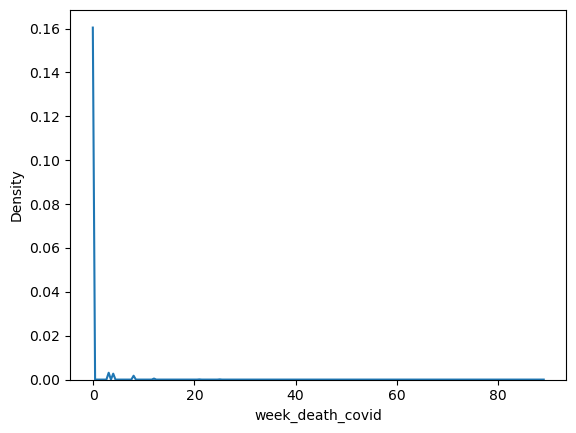

In [126]:
sns.kdeplot(data=df, x='week_death_covid')

<Axes: xlabel='week_death_covid_arcsinh', ylabel='Density'>

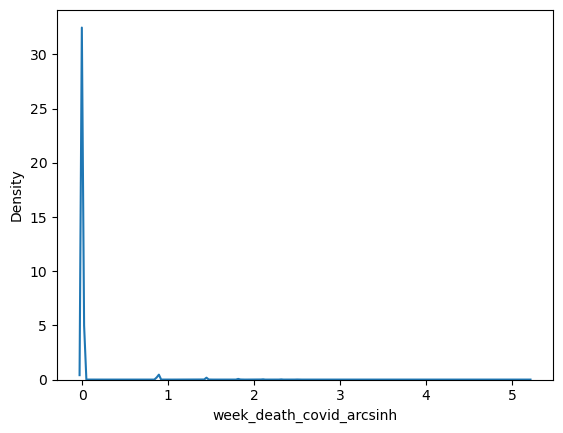

In [127]:
df['week_death_covid_arcsinh'] = np.arcsinh(df['week_death_covid'])
sns.kdeplot(data=df, x='week_death_covid_arcsinh')

According to the kernel density plot, the distribution looks heavily skewed. The figure contains Most of the values very low with a long tair of larger values. The result didn't improve after rescaling because of the overwhelming number of zeros.

<Axes: xlabel='week_confirmed', ylabel='bed'>

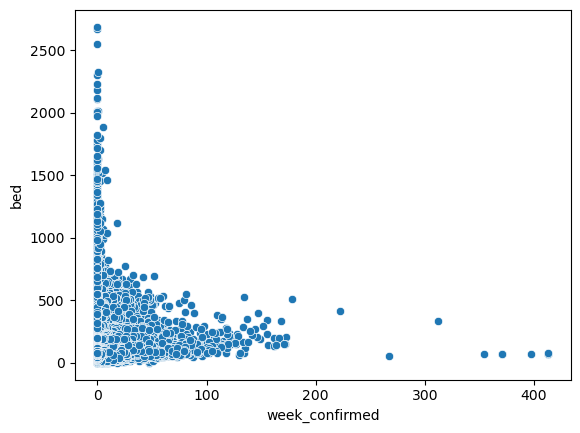

In [128]:
sns.scatterplot(data=df,x='week_confirmed',y='bed')

The scatter plots shows an inverse relationship between 'bed' and 'week_confirmed'. This could mean that when nursing homes have mroe covid-19 cases, fewer beds are occupied, as patients may be moved to hospitals. However, there are plenty datas clusted at low values of 'week_confirmed', indicating that the majority of nursing homes report few or no cases but have a range of bed occupancies.

In [129]:
print(pd.crosstab(df['week_confirmed'],df['bed']))

bed             0.0     1.0     2.0     3.0     4.0     5.0     6.0     \
week_confirmed                                                           
0.0              11807     660     901    1013    1239    1455    1536   
1.0                 41      17      13      19      34      41      33   
2.0                 17       2       3       5       8      10      21   
3.0                  5       1       2       4       4       3       6   
4.0                  7       0       2       0       5       4       1   
...                ...     ...     ...     ...     ...     ...     ...   
312.0                0       0       0       0       0       0       0   
354.0                0       0       0       0       0       0       0   
371.0                0       0       0       0       0       0       0   
397.0                0       0       0       0       0       0       0   
413.0                0       0       0       0       0       0       0   

bed             7.0     8.0     9.0  

The table doesn't provide any useful information because no categorical values are including, which leads to a huge numbers of columns making it extremely wide and hard to interpret visually. Moreover, the data itself contains may zeros, resulting in a spare table where most cells contain zeros, making it hard to see meaningful relationships between the variables. To improve that, the bed number can be grouped into different range to reduce the numbers of columns and make the data easier to interpret.